# **Model: URL Identification Model**

# **libraries and data files loading**

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading the dataframe
lg_df=pd.read_csv('legitimate_urls.csv',sep="|")  # legitimate urls
ml_df=pd.read_csv('malicious_urls.csv',sep="|")  # malicious urls

# **Data Understanding and Preprocessing**

In [ ]:
# data understanding for legetimate databse
print("Size of Legitimate db:- ",lg_df.shape)
print()
print("Columns:- ",lg_df.columns)
lg_df.head()

Size of Legitimate db:-  (6000, 2)

Columns:-  Index(['Unnamed: 0', 'URLs'], dtype='object')


,Unnamed: 0,URLs
0,0,http://graphicriver.net/search?date=this-month...
1,1,http://ecnavi.jp/redirect/?url=http://www.cros...
2,2,https://hubpages.com/signin?explain=follow+Hub...
3,3,http://extratorrent.cc/torrent/4190536/AOMEI+B...
4,4,http://icicibank.com/Personal-Banking/offers/o...


In [ ]:
# data understanding for Phishing databse
print("Size of Phishing db:- ",ml_df.shape)
print()
print("Columns:- ",ml_df.columns)
ml_df.sample(8)

Size of Phishing db:-  (1000, 9)

Columns:-  Index(['Unnamed: 0', 'phish_id', 'url', 'phish_detail_url', 'submission_time',
       'verified', 'verification_time', 'online', 'target'],
      dtype='object')


,Unnamed: 0,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
195,195,6497636,https://anbenig.com/home,http://www.phishtank.com/phish_detail.php?phis...,2020-04-10T14:22:38+00:00,yes,2020-04-10T14:57:20+00:00,yes,Other
326,326,6542018,https://docs.google.com/forms/d/e/1FAIpQLSfTIz...,http://www.phishtank.com/phish_detail.php?phis...,2020-05-01T21:02:20+00:00,yes,2020-05-02T05:28:47+00:00,yes,Other
755,755,6531638,https://docs.google.com/forms/d/e/1FAIpQLSd-uL...,http://www.phishtank.com/phish_detail.php?phis...,2020-04-27T08:55:02+00:00,yes,2020-04-28T14:19:22+00:00,yes,Other
824,824,6533776,http://porquebiotecnologia.com.ar/components/c...,http://www.phishtank.com/phish_detail.php?phis...,2020-04-28T02:21:24+00:00,yes,2020-04-28T02:40:41+00:00,yes,Other
115,115,6536444,http://seg-dispositivo.com/login/,http://www.phishtank.com/phish_detail.php?phis...,2020-04-29T04:01:05+00:00,yes,2020-04-29T04:05:05+00:00,yes,Other
47,47,6554363,https://amazon.co.jp.lcmgo.com/,http://www.phishtank.com/phish_detail.php?phis...,2020-05-08T11:28:28+00:00,yes,2020-05-08T11:30:41+00:00,yes,Amazon.com
418,418,6466711,https://tioflaninat1974.blogspot.com/,http://www.phishtank.com/phish_detail.php?phis...,2020-03-24T15:49:12+00:00,yes,2020-03-24T15:51:07+00:00,yes,Other
775,775,6483603,https://ummamiexpress.com/direktnet.raiffeisen...,http://www.phishtank.com/phish_detail.php?phis...,2020-04-02T23:05:37+00:00,yes,2020-04-02T23:18:20+00:00,yes,Other


In [ ]:
ml_df.columns

Index(['Unnamed: 0', 'phish_id', 'url', 'phish_detail_url', 'submission_time',
       'verified', 'verification_time', 'online', 'target'],
      dtype='object')

In [ ]:
ml_df.nunique()

Unnamed: 0           1000
phish_id             1000
url                  1000
phish_detail_url     1000
submission_time       998
verified                1
verification_time     974
online                  1
target                 29
dtype: int64

In [ ]:
#determining the information from the database
print("Legitimate database information:-")
lg_df.info()


Legitimate database information:-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6000 non-null   int64 
 1   URLs        6000 non-null   object
dtypes: int64(1), object(1)
memory usage: 93.9+ KB


In [ ]:
print("Phishing database information:- ")
ml_df.info()

Phishing database information:- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         1000 non-null   int64 
 1   phish_id           1000 non-null   int64 
 2   url                1000 non-null   object
 3   phish_detail_url   1000 non-null   object
 4   submission_time    1000 non-null   object
 5   verified           1000 non-null   object
 6   verification_time  1000 non-null   object
 7   online             1000 non-null   object
 8   target             1000 non-null   object
dtypes: int64(2), object(7)
memory usage: 70.4+ KB


In [ ]:
# checking for the duplicates
print("Legitimate db:- ")
print(lg_df.duplicated().sum())
print("Phishing db:-")
print(ml_df.duplicated().sum())

Legitimate db:- 
0
Phishing db:-
0


In [ ]:
# Determining the data Nullity
ml_df.isnull().sum()

Unnamed: 0           0
phish_id             0
url                  0
phish_detail_url     0
submission_time      0
verified             0
verification_time    0
online               0
target               0
dtype: int64

In [ ]:
# Determining the data Nullity
lg_df.isnull().sum()

Unnamed: 0    0
URLs          0
dtype: int64

Since both databases contain unique and non-null information, there is no need to handle missing values or remove duplicate rows from the dataset.

In [ ]:
# trimming the white spaces in the url and convert the characters to lowercase
lg_df['URLs']=lg_df['URLs'].str.strip()
lg_df['URLs']=lg_df['URLs'].str.lower()
ml_df['url']=ml_df['url'].str.strip()
ml_df['url']=ml_df['url'].str.lower()

In [ ]:
# Analysing the importance of features in the dataset
legitimate_df=lg_df.copy()
malicious_df=ml_df.copy()

legitimate_df['url']=legitimate_df['URLs']
legitimate_df=legitimate_df.drop(['URLs'],axis=1)

legitimate_df['label']=0
malicious_df['label']=1

# Keep only the 'url' and 'label' columns from legitimate_df
legitimate_df = legitimate_df[['url', 'label']]

# Keep the 'url' and 'label' columns from malicious_df, along with any other columns we want to investigate
malicious_df = malicious_df[['url', 'label']]

# Combine the datasets
combined_df = pd.concat([legitimate_df, malicious_df], ignore_index=True)
combined_df.columns

Index(['url', 'label'], dtype='object')

# **Feature Extraction**

In [ ]:
import re # to check for the IP address in the url
from urllib.parse import urlparse # to extract different components of url
import pandas as pd # to apply feature extraction function in url

# Function to extract features from a URL
def extract_features(url):
    features = {}
# url structure : scheme://netloc/path;parameters?query#fragment
#ParseResult(scheme='scheme', netloc='netloc', path='/path;', params='parameters',query='query', fragment='fragment')
    # Feature 1: Domain of URL (to be dropped later)
    domain = urlparse(url).netloc
    features['domain_of_url'] = domain

    # Feature 2: IP Address in URL
    ip_pattern = re.compile(r'(\d{1,3}\.){3}\d{1,3}') # matches the three gps of 1 to 3 digits followed by dots and last gp of 1 to 3 digits)
    if ip_pattern.search(domain):
        features['ip_address_in_url'] = 1
    else:
        features['ip_address_in_url'] = 0

    # Feature 3: "@" Symbol in URL
    if '@' in url:
        features['at_symbol_in_url'] = 1
    else:
        features['at_symbol_in_url'] = 0

    # Feature 4: Length of URL
    if len(url) >= 54:
        features['length_of_url'] = 1 #ex:-url:http://www.phishtank.com/phish_detail.php?phish_id=6545413  length=58 therefore 1 is assigned
    else:
        features['length_of_url'] = 0

    # Feature 5: Depth of URL
    path = urlparse(url).path #checks for the count of "/" in the domain name of url
    features['depth_of_url'] = path.count('/')

    # Feature 6: Redirection "//" in URL
    last_double_slash_pos = url.rfind('//')
    if url.startswith('https://'):
        features['redirects'] = int(last_double_slash_pos > 7)
    elif url.startswith('http://'):
        features['redirects'] = int(last_double_slash_pos > 6)
    else:
        features['redirects'] = int(last_double_slash_pos > 0)

    # Feature 7: searching more than 1 "http/https" in url ,if yes than phising(1) if no than legitimate(0)
    http_count = url.lower().count('http')
    https_count = url.lower().count('https')
    http_https_count = http_count + https_count
    if http_https_count > 1:
        features['http_https_count'] = 1
    else:
        features['http_https_count'] = 0

    # Feature 8: Using URL Shortening Services “TinyURL”
    shortening_services = ['bit.ly', 'tinyurl.com', 'goo.gl', 'ow.ly', 't.co', 'bit.do', 'lc.chat', 'is.gd', 'shorte.st',
    'bc.vc', 'cutt.ly', 'u.to', 'cli.gs', 'fy.vc', 'tiny.cc','bit.ly', 'goo.gl', 'shorte.st', 'go2l.ink', 'x.co', 'ow.ly',
    't.co', 'tinyurl.com', 'tr.im', 'is.gd','cli.gs', 'yfrog.com', 'migre.me', 'ff.im', 'tiny.cc', 'url4.eu',
    'twit.ac', 'su.pr', 'twurl.nl', 'snipurl.com',
    'short.to', 'BudURL.com', 'ping.fm', 'post.ly', 'Just.as', 'bkite.com', 'snipr.com', 'fic.kr', 'loopt.us',
    'doiop.com', 'short.ie', 'kl.am', 'wp.me', 'rubyurl.com', 'om.ly', 'to.ly', 'bit.do', 'lnkd.in', 'db.tt',
    'qr.ae', 'adf.ly', 'bitly.com', 'cur.lv', 'tinyurl.com', 'ow.ly', 'bit.ly', 'ity.im', 'q.gs', 'is.gd',
    'po.st', 'bc.vc', 'twitthis.com', 'u.to', 'j.mp', 'buzurl.com', 'cutt.us', 'u.bb', 'yourls.org', 'x.co',
    'prettylinkpro.com', 'scrnch.me', 'filoops.info', 'vzturl.com', 'qr.net', '1url.com', 'tweez.me', 'v.gd',
    'tr.im', 'link.zip.net']
    if any(service in url for service in shortening_services):
        features['url_shortening_service'] = 1
    else:
        features['url_shortening_service'] = 0

    # Feature 9: Number of Subdomains
    domain = urlparse(url).netloc
    domain_parts = domain.split('.')
    if domain_parts[0] == 'www':
        domain_parts = domain_parts[1:]
    num_dots = len(domain_parts) - 1
    if num_dots == 1:
        features['num_subdomains'] = 0  # Legitimate
    elif num_dots == 2:
        features['num_subdomains'] = 1  # Suspicious
    else:
        features['num_subdomains'] = 2  # Phishing

    # Feature 10: Presence of Suspicious Words
    suspicious_words = ['secure', 'login', 'verify', 'account', 'update', 'banking',
                        'verify', 'account', 'update', 'banking','server', 'client',
                          'secure', 'ebayisapi', 'webscr', 'login', 'signin', 'update',
                          'click', 'password', 'verify', 'lucky', 'bonus', 'suspend',
                          'paypal', 'wordpress', 'includes', 'admin', 'alibaba',
                          'myaccount', 'dropbox', 'themes', 'plugins', 'logout',
                          'signout', 'submit', 'limited', 'securewebsession',
                          'redirectme', 'recovery', 'secured', 'refund',
                          'webservis', 'giveaway', 'webspace', 'servico',
                          'webnode', 'dispute', 'review', 'browser', 'billing',
                          'temporary', 'restore', 'verification', 'required',
                          'resolution', '000webhostapp', 'webhostapp', 'wp',
                          'content', 'site', 'images', 'js', 'css', 'view', 'confirm']
    features['suspicious_words_in_url'] = int(any(word in url for word in suspicious_words))

    # Feature 11: Prefix or Suffix "-" in Domain
    if '-' in domain:
        features['prefix_suffix_in_domain'] = 1
    else:
        features['prefix_suffix_in_domain'] = 0


    redirection_count = 0

    # Check if the URL starts with 'http://' or 'https://'
    if url.startswith('http://'):
        start_index = 7
    elif url.startswith('https://'):
        start_index = 8
    else:
        # If URL doesn't start with 'http://' or 'https://', consider the whole URL
        start_index = 0

    return features

# Apply feature extraction
features_df = combined_df['url'].apply(extract_features).apply(pd.Series)

# Merge the features back into the original DataFrame
combined_df = pd.concat([combined_df, features_df], axis=1)

# Drop the 'domain_of_url' column as it is not significant
combined_df.drop(columns=['domain_of_url'], inplace=True)

# Display the first few rows to check if feature extraction worked correctly
combined_df.head()


,url,label,ip_address_in_url,at_symbol_in_url,length_of_url,depth_of_url,redirects,http_https_count,url_shortening_service,num_subdomains,suspicious_words_in_url,prefix_suffix_in_domain
0,http://graphicriver.net/search?date=this-month...,0,0,0,1,1,0,0,0,0,1,0
1,http://ecnavi.jp/redirect/?url=http://www.cros...,0,0,0,1,2,1,1,0,0,0,0
2,https://hubpages.com/signin?explain=follow+hub...,0,0,0,1,1,0,1,0,0,1,0
3,http://extratorrent.cc/torrent/4190536/aomei+b...,0,0,0,1,3,0,0,0,0,1,0
4,http://icicibank.com/personal-banking/offers/o...,0,0,0,1,3,0,0,0,0,1,0


**url** = "http://ecnavi.jp/redirect/?url=http://www.cross-a.net/x.php?id=1845_3212_22061_26563&m=1004&pid=%user_id%"

*   Domain of URL: ecnavi.jp
*   IP Address in URL: 0 (no IP address found)
*   path=/redirect/
*   "@" Symbol in URL: 0 (no "@" symbol)
*   Length of URL: 1 (URL length is >=54)
*   Depth of URL: 2 (two segments in the path: redirect and the nested
  URL's path)
*  Redirection "//" in URL: 1 (redirection "//" found after the
   protocol)
*  "http/https" in Domain name: 0 (no "http" or "https" in the domain
  name)
*   Using URL Shortening Services: 0 (no URL shortening service found)
*   Number of Subdomains: 1 (one subdomain in the domain: ecnavi)
*   Presence of Suspicious Words: 0 (no suspicious words found)
*   Prefix or Suffix "-" in Domain: 0 (no "-" in the domain)
Therefore, The url is labelled as zero(Legetimate)


In [ ]:
combined_df.tail()

,url,label,ip_address_in_url,at_symbol_in_url,length_of_url,depth_of_url,redirects,http_https_count,url_shortening_service,num_subdomains,suspicious_words_in_url,prefix_suffix_in_domain
6995,http://kaitystein.com/blog/profile/,1,0,0,0,3,0,0,0,0,0,0
6996,http://peacefulplushes.com/adobe-pdf/invoice/i...,1,0,0,1,3,0,0,0,0,0,0
6997,https://betasus778.blogspot.com/,1,0,0,0,1,0,1,1,1,0,0
6998,https://lootluck.tk/,1,0,0,0,1,0,1,0,0,0,0
6999,https://han.gl/nqm0o,1,0,0,0,1,0,1,0,0,0,0


URL:-http://www.phishtank.com/phish_detail.php?phish_id=6545413


*   Domain: phishtank.com
*   path: /phish_detail.php
*   No IP address
*   No redirection in domain name
*   URL length is greater than 54
*   no prefix and suffix(-)
*   no shortening services
*   No. of subdomian is 1
*   depth of url- 1(/phish_detail.php)
*   no suspicious words in url






In [ ]:
combined_df.columns

Index(['url', 'label', 'ip_address_in_url', 'at_symbol_in_url',
       'length_of_url', 'depth_of_url', 'redirects', 'http_https_count',
       'url_shortening_service', 'num_subdomains', 'suspicious_words_in_url',
       'prefix_suffix_in_domain'],
      dtype='object')

In [ ]:
combined_df.shape

(7000, 12)

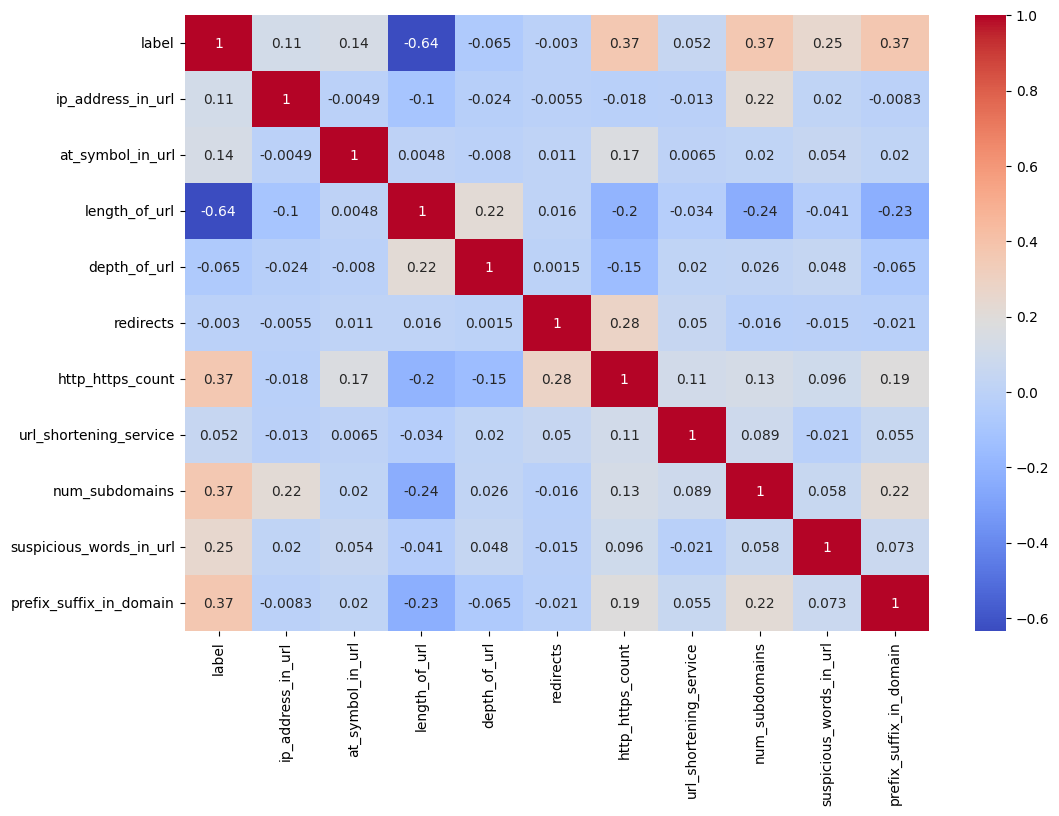

In [ ]:

# Select only numeric columns for correlation matrix
numeric_columns = combined_df.select_dtypes(include=[float, int]).columns
plt.figure(figsize=(12, 8))
sns.heatmap(combined_df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.show()



We derived the additional important features for the URL detection:- no_of_subdomain, prefix_suffix and depth of url

In [ ]:
combined_df.sample(1)

,url,label,ip_address_in_url,at_symbol_in_url,length_of_url,depth_of_url,redirects,http_https_count,url_shortening_service,num_subdomains,suspicious_words_in_url,prefix_suffix_in_domain
5047,http://emgn.com/entertainment/what-these-peopl...,0,0,0,1,3,0,0,0,0,0,0


Extracting the Address Bar feature

In [ ]:
combined_df=combined_df.drop(['url'],axis=1)
combined_df.shape

(7000, 11)

# **EDA(Exploratory Data Analysis)**

In [ ]:
combined_df.isnull().sum()

label                      0
ip_address_in_url          0
at_symbol_in_url           0
length_of_url              0
depth_of_url               0
redirects                  0
http_https_count           0
url_shortening_service     0
num_subdomains             0
suspicious_words_in_url    0
prefix_suffix_in_domain    0
dtype: int64

In [ ]:
combined_df.describe()

,label,ip_address_in_url,at_symbol_in_url,length_of_url,depth_of_url,redirects,http_https_count,url_shortening_service,num_subdomains,suspicious_words_in_url,prefix_suffix_in_domain
count,7000.000000,7000.000000,7000.00000,7000.00000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,0.142857,0.002143,0.01100,0.93700,3.520429,0.013857,0.135429,0.074714,0.146000,0.218143,0.031429
std,0.349952,0.046245,0.10431,0.24298,2.064231,0.116906,0.342205,0.262949,0.393327,0.413014,0.174485
min,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,1.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,1.00000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.00000,1.00000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.00000,21.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000


In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   label                    7000 non-null   int64
 1   ip_address_in_url        7000 non-null   int64
 2   at_symbol_in_url         7000 non-null   int64
 3   length_of_url            7000 non-null   int64
 4   depth_of_url             7000 non-null   int64
 5   redirects                7000 non-null   int64
 6   http_https_count         7000 non-null   int64
 7   url_shortening_service   7000 non-null   int64
 8   num_subdomains           7000 non-null   int64
 9   suspicious_words_in_url  7000 non-null   int64
 10  prefix_suffix_in_domain  7000 non-null   int64
dtypes: int64(11)
memory usage: 601.7 KB


In [ ]:
df_cat=combined_df.copy()

In [ ]:
# Identifying the categorial and continous dataset
# Identifiaction of Continous dataset
num_cols=df_cat._get_numeric_data().columns
cont_cols=[]
for i in num_cols:
  if(len(df_cat[i].unique())) > int(df_cat.shape[0]/25):
     cont_cols.append(i)
print (cont_cols)

[]


In [ ]:
# Identification of Categorial Dataset
cat_cols=list(set(df_cat.columns)-set(cont_cols))
cat_cols

['num_subdomains',
 'suspicious_words_in_url',
 'at_symbol_in_url',
 'label',
 'url_shortening_service',
 'depth_of_url',
 'length_of_url',
 'http_https_count',
 'prefix_suffix_in_domain',
 'redirects',
 'ip_address_in_url']

# **Data Visualization**

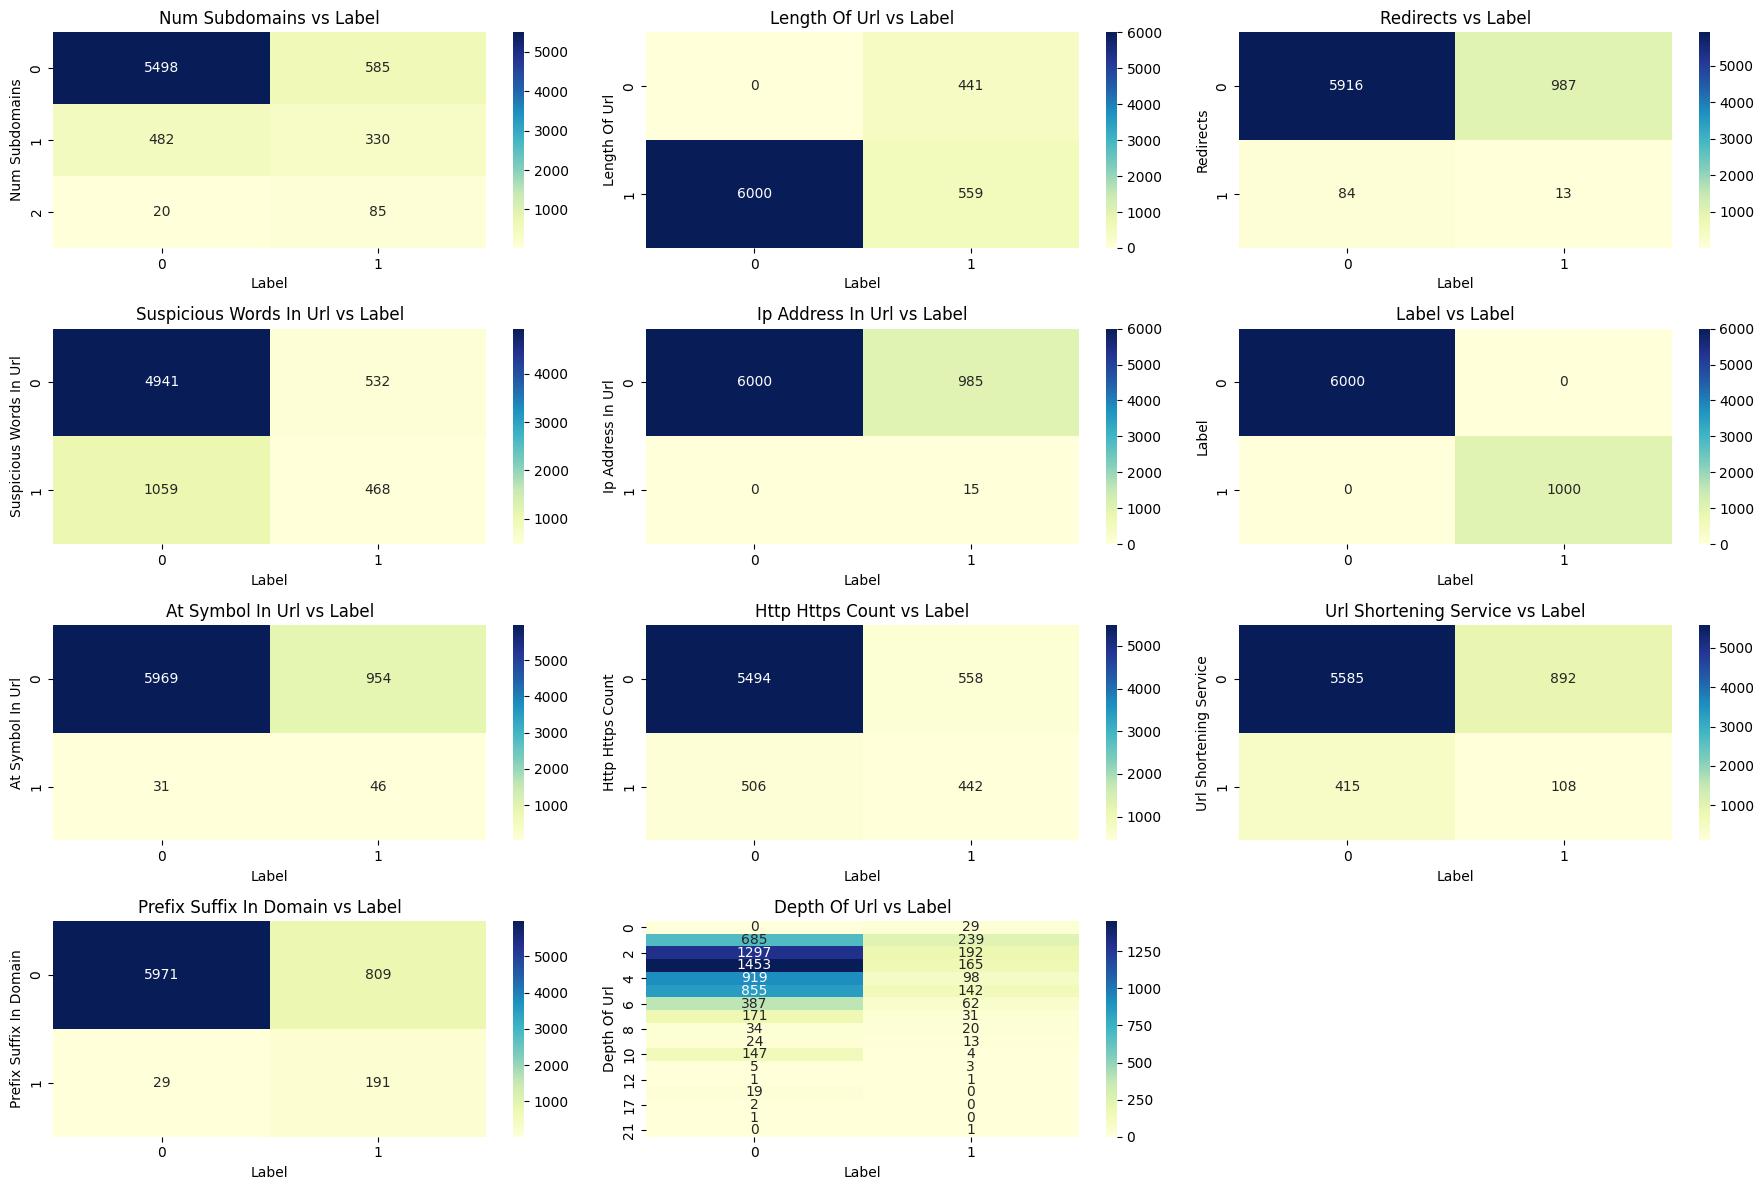

In [ ]:
# List of features to visualize
features = ['num_subdomains', 'length_of_url', 'redirects', 'suspicious_words_in_url', 'ip_address_in_url', 'label', 'at_symbol_in_url', 'http_https_count',
            'url_shortening_service', 'prefix_suffix_in_domain', 'depth_of_url']
# Create subplots
fig, axes = plt.subplots(4, 3, figsize=(18, 3 * 4))

# Flatten axes if there are multiple rows
axes = axes.flatten()

for i, feature in enumerate(features):
    # Crosstab and heatmap
    crosstab = pd.crosstab(df_cat[feature], df_cat['label'])
    # print(crosstab)
    sns.heatmap(crosstab, annot=True, fmt="d", cmap="YlGnBu", ax=axes[i])
    axes[i].set_title(f'{feature.replace("_", " ").title()} vs Label')
    axes[i].set_xlabel('Label')
    axes[i].set_ylabel(feature.replace("_", " ").title())

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Inference:(1) URLs with an IP address are highly indicative of phishing, as all such URLs in the dataset are labeled as phishing.

(2)URLs with an "@" symbol are more likely to be phishing, as a higher proportion of such URLs are labeled as phishing compared to legitimate.

(3) Short URLs are highly indicative of phishing, as all short URLs in the dataset are labeled as phishing.

(4) URLs with higher depths tend to be legitimate, while URLs with lower depths have a higher likelihood of being phishing.

(5) URLs without redirection are more likely to be phishing, as the majority of phishing URLs lack redirection.

(6) Either "https"/"http" or both are more than 1, then labeled as (1)phishing, else (0)legitimate.

(7) URLs using URL shortening services are more likely to be phishing, as a significant proportion of such URLs are labeled as phishing.

(8) URLs with a higher number of subdomains (3 or more) are more likely to be associated with phishing attempts

(9)URLs with prefixes or suffixes in the domain (identified by prefix_suffix_in_domain = 1) are more likely to be phishing

Inference:-

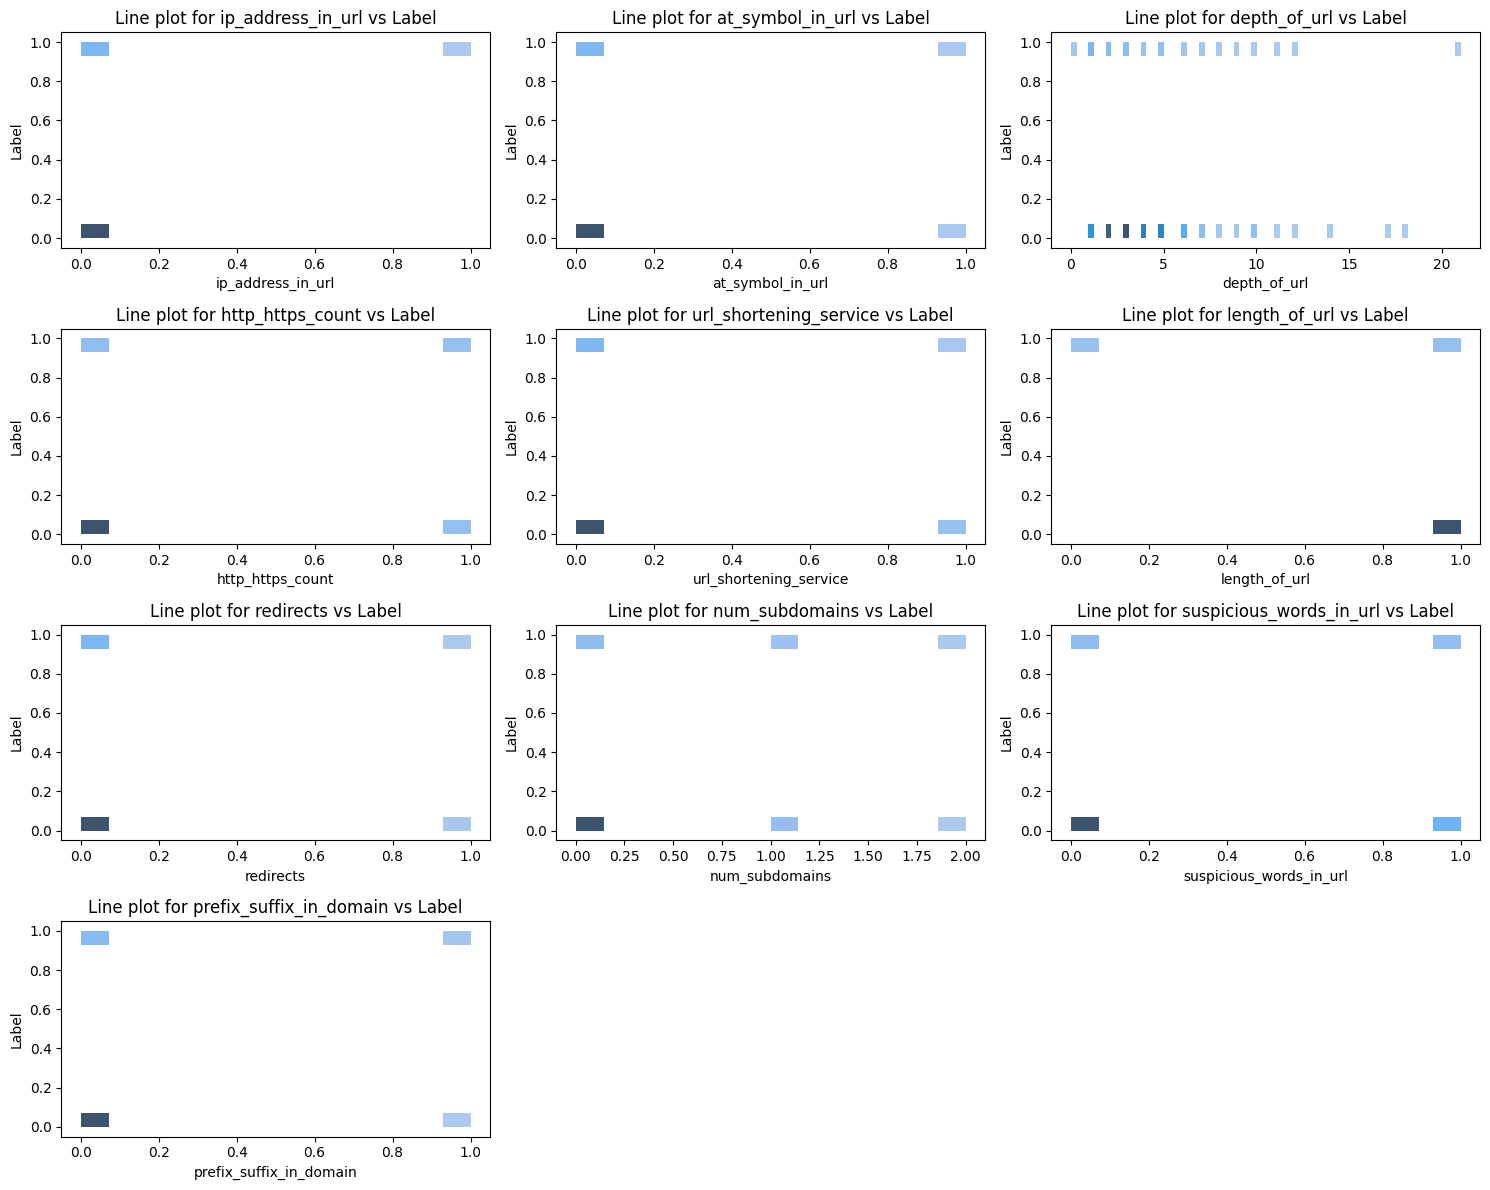

In [ ]:
features = ['ip_address_in_url', 'at_symbol_in_url', 'depth_of_url',
            'http_https_count', 'url_shortening_service', 'length_of_url',
            'redirects', 'num_subdomains', 'suspicious_words_in_url',
            'prefix_suffix_in_domain']

# Create subplots with a 4x3 grid
fig, axes = plt.subplots(4, 3, figsize=(15, 12))

# Flatten axes array to iterate over each subplot
axes = axes.flatten()

# Iterate over features and plot each pair
for i, feature in enumerate(features):
    sns.histplot(x=feature, y='label', data=df_cat, ax=axes[i])
    axes[i].set_title(f'Line plot for {feature} vs Label')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Label')

# Hide the unused subplots if any
for j in range(len(features), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Since, In our dataset their is no continous feature therefore no outliers detection is performed.

# **One Hot Label Encoding**

In [ ]:
df_cat.sample(5)

,label,ip_address_in_url,at_symbol_in_url,length_of_url,depth_of_url,redirects,http_https_count,url_shortening_service,num_subdomains,suspicious_words_in_url,prefix_suffix_in_domain
4952,0,0,0,1,10,0,0,0,0,0,0
5604,0,0,0,1,2,0,0,0,0,1,0
3263,0,0,0,1,2,0,0,0,0,0,0
4119,0,0,0,1,4,0,0,0,0,0,0
6179,1,1,0,0,3,0,0,0,2,0,0


In [ ]:
# Ensures that the model is not biased trained with the values
df_ohe=df_cat.copy()
df_cat.columns

Index(['label', 'ip_address_in_url', 'at_symbol_in_url', 'length_of_url',
       'depth_of_url', 'redirects', 'http_https_count',
       'url_shortening_service', 'num_subdomains', 'suspicious_words_in_url',
       'prefix_suffix_in_domain'],
      dtype='object')

In [ ]:
# Drop the target colunm from the dataset
df_target=df_ohe['label']
df_ohe=df_ohe.drop(['label'],axis=1)

In [ ]:
# Update the categorial columns
cat_cols=list(set(df_ohe.columns)-set(cont_cols))

In [ ]:
df_ohe= pd.get_dummies(df_ohe,columns=cat_cols)
df_ohe = df_ohe.astype(int)
print(df_ohe.head())
print(df_ohe.shape)

   num_subdomains_0  num_subdomains_1  num_subdomains_2  \
0                 1                 0                 0   
1                 1                 0                 0   
2                 1                 0                 0   
3                 1                 0                 0   
4                 1                 0                 0   

   suspicious_words_in_url_0  suspicious_words_in_url_1  at_symbol_in_url_0  \
0                          0                          1                   1   
1                          1                          0                   1   
2                          0                          1                   1   
3                          0                          1                   1   
4                          0                          1                   1   

   at_symbol_in_url_1  url_shortening_service_0  url_shortening_service_1  \
0                   0                         1                         0   
1               

Since, the data is already in the range of 0 and 1 so no need to do Normalization or Standardization.

# **Data Splitting for Base Model**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df_ohe,df_target, test_size=0.20, random_state=42, stratify=df_target)

In [ ]:
# determining the splitting ratio of data in train and test
print("train dataset Rows:- ",len(X_train))
print("train dataset Columns:- ", len(Y_train))
print("test dataset Rows:- ", len(X_test))
print("train dataset Columns:- ", len(Y_test))

train dataset Rows:-  5600
train dataset Columns:-  5600
test dataset Rows:-  1400
train dataset Columns:-  1400


# **Building different models**

In [ ]:
# Initialising the different object of Classification Models
df_dt = DecisionTreeClassifier()
df_rf=RandomForestClassifier()
df_gb=GradientBoostingClassifier()

df_dt.fit(X_train, Y_train)
df_rf.fit(X_train, Y_train)
df_gb.fit(X_train, Y_train)

GradientBoostingClassifier()

         feature importance of decision tree
                      feature  importance
27            length_of_url_1    0.522362
30  prefix_suffix_in_domain_0    0.109992
0            num_subdomains_0    0.090568
3   suspicious_words_in_url_0    0.058782
29         http_https_count_1    0.030507
10             depth_of_url_1    0.021649
28         http_https_count_0    0.018644
11             depth_of_url_2    0.017937
6          at_symbol_in_url_1    0.017797
14             depth_of_url_5    0.015731
17             depth_of_url_8    0.011967


<ipython-input-37-45084669aaff>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importances_df, palette='viridis')


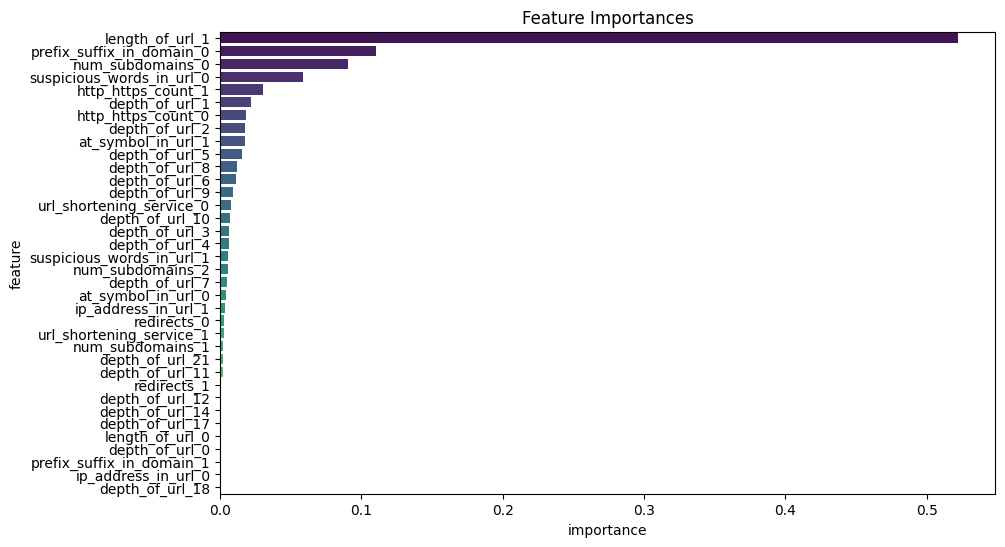

In [ ]:
importances = df_dt.feature_importances_
features = X_train.columns

# Create a dataframe with feature names and importances
feature_importances_df = pd.DataFrame({'feature': features, 'importance': importances})

# Sort the dataframe by importance in descending order
feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)
print("         feature importance of decision tree")
# Display the top 10 most important features
print(feature_importances_df.head(11))

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances_df, palette='viridis')
plt.title('Feature Importances')
plt.show()

           feature importance of randomforest
                      feature  importance
26            length_of_url_0    0.239020
27            length_of_url_1    0.195213
0            num_subdomains_0    0.057058
29         http_https_count_1    0.056868
28         http_https_count_0    0.054447
31  prefix_suffix_in_domain_1    0.054206
30  prefix_suffix_in_domain_0    0.052235
3   suspicious_words_in_url_0    0.033809
4   suspicious_words_in_url_1    0.030256
1            num_subdomains_1    0.029157
10             depth_of_url_1    0.026167


<ipython-input-38-0a3622c5eb4a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importances_df, palette='viridis')


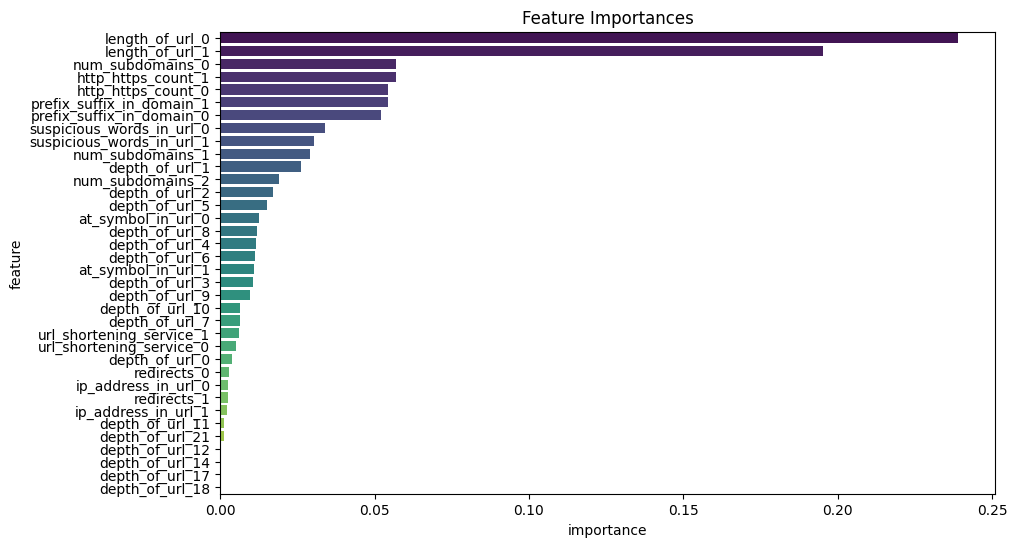

In [ ]:
importances = df_rf.feature_importances_
features = X_train.columns

# Create a dataframe with feature names and importances
feature_importances_df = pd.DataFrame({'feature': features, 'importance': importances})

# Sort the dataframe by importance in descending order
feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)
print("           feature importance of randomforest")
# Display the top 10 most important features
print(feature_importances_df.head(11))

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances_df, palette='viridis')
plt.title('Feature Importances')
plt.show()

        feature importance of Gradient Boosting
                      feature  importance
26            length_of_url_0    0.448830
27            length_of_url_1    0.107004
0            num_subdomains_0    0.081568
28         http_https_count_0    0.060430
30  prefix_suffix_in_domain_0    0.045197
3   suspicious_words_in_url_0    0.037621
29         http_https_count_1    0.034415
31  prefix_suffix_in_domain_1    0.034268
4   suspicious_words_in_url_1    0.033475
10             depth_of_url_1    0.017786
5          at_symbol_in_url_0    0.015806


<ipython-input-39-2fb01dfbd233>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importances_df, palette='viridis')


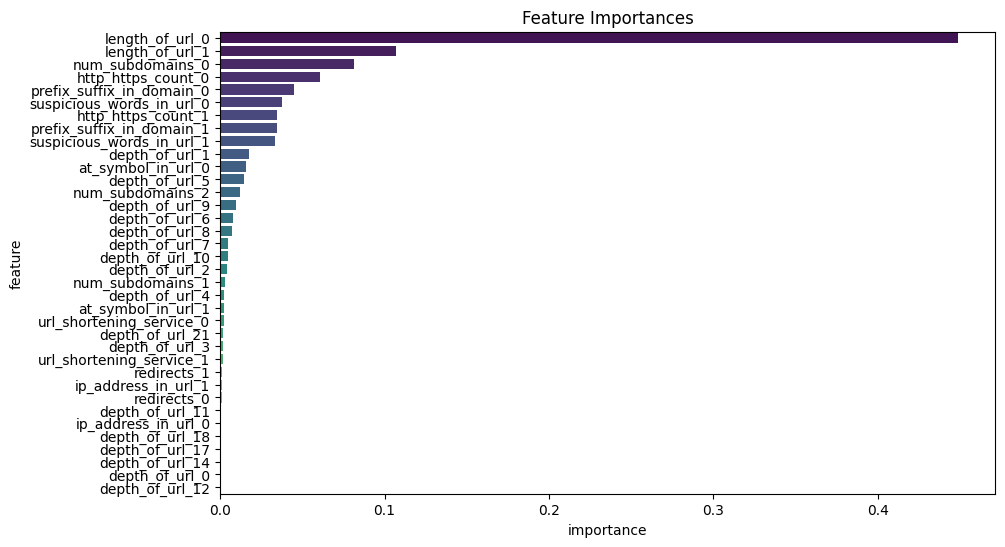

In [ ]:
importances = df_gb.feature_importances_
features = X_train.columns

# Create a dataframe with feature names and importances
feature_importances_df = pd.DataFrame({'feature': features, 'importance': importances})

# Sort the dataframe by importance in descending order
feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)
print("        feature importance of Gradient Boosting")

# Display the top 10 most important features
print(feature_importances_df.head(11))

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances_df, palette='viridis')
plt.title('Feature Importances')
plt.show()

In [ ]:
Y_predict_df = df_dt.predict(X_test)
Y_predict_rf =df_rf.predict(X_test)
Y_predict_gb = df_gb.predict(X_test)
print("Metrices for Decision Tree")
print("Accuracy:   ",accuracy_score(Y_test,Y_predict_df))
print ("Precision:  ",precision_score(Y_test, Y_predict_df))
print("Recall:     ",recall_score(Y_test, Y_predict_df))
print("F1_score:   ",f1_score(Y_test, Y_predict_df))
print("Metrices for Random Forest Classifier")
print("Accuracy:   ",accuracy_score(Y_test,Y_predict_rf))
print ("Precision:  ",precision_score(Y_test, Y_predict_rf))
print("Recall:     ",recall_score(Y_test, Y_predict_rf))
print("F1_score:   ",f1_score(Y_test, Y_predict_rf))
print("Metrices for Gradient Boosting Classifier")
print("Accuracy:   ",accuracy_score(Y_test,Y_predict_gb))
print ("Precision:  ",precision_score(Y_test, Y_predict_gb))
print("Recall:     ",recall_score(Y_test, Y_predict_gb))
print("F1_score:   ",f1_score(Y_test, Y_predict_gb))

Metrices for Decision Tree
Accuracy:    0.9557142857142857
Precision:   0.9423076923076923
Recall:      0.735
F1_score:    0.8258426966292134
Metrices for Random Forest Classifier
Accuracy:    0.9542857142857143
Precision:   0.925
Recall:      0.74
F1_score:    0.8222222222222222
Metrices for Gradient Boosting Classifier
Accuracy:    0.9507142857142857
Precision:   0.9281045751633987
Recall:      0.71
F1_score:    0.8045325779036826


Confusion Matrix for Decision Tree


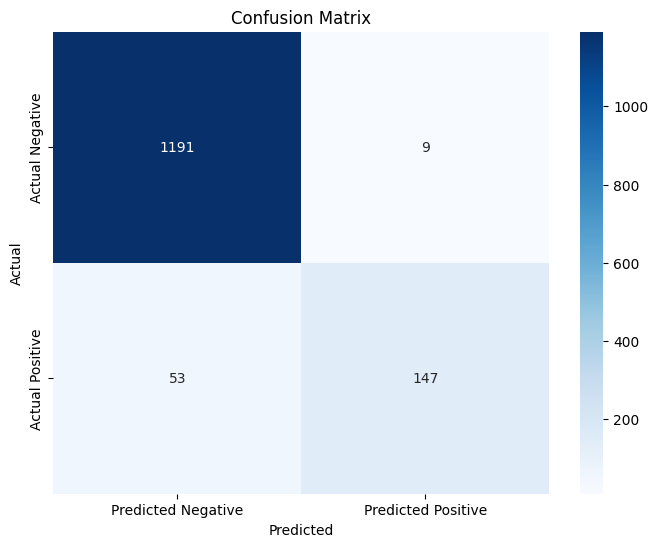

Confusion Matrix for Random Forest Classifier


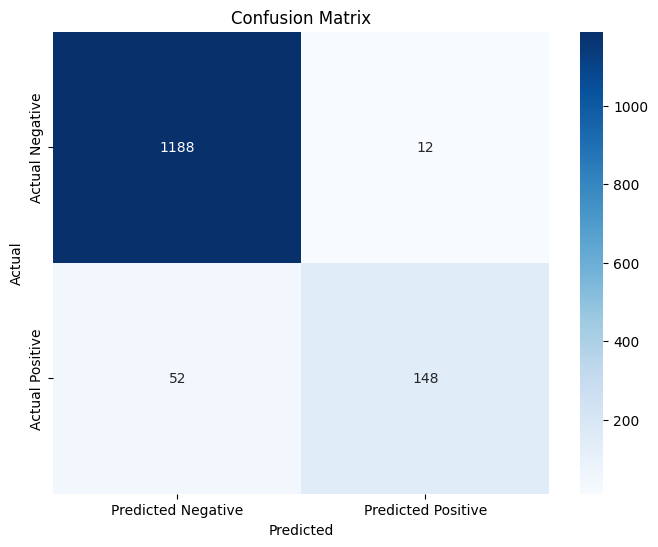

Confusion Matrix for Gradient Booster Algorithm


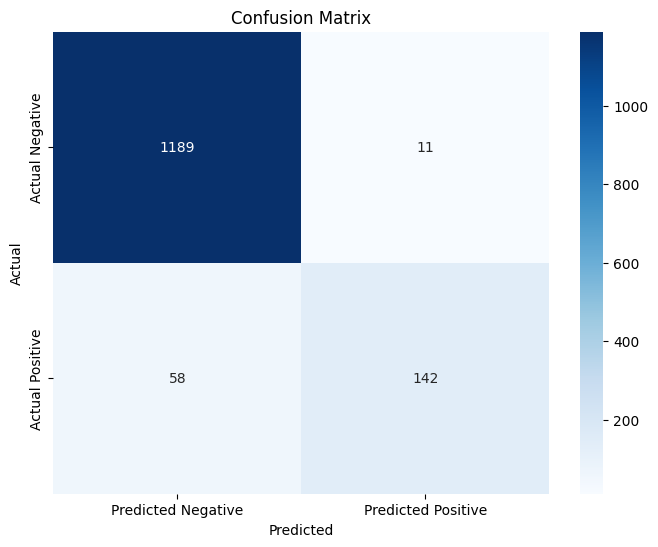

In [ ]:
# determining the confusion matrix for each algorithm
print("Confusion Matrix for Decision Tree")
cm = confusion_matrix(Y_test,Y_predict_df)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Confusion Matrix for Random Forest Classifier")
cm1 = confusion_matrix(Y_test,Y_predict_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Confusion Matrix for Gradient Booster Algorithm")
cm2 = confusion_matrix(Y_test,Y_predict_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



## among all 3 of them random forest performs better therefore we perform different data balancing techniques on random forest

# **Data Balancing on random forest using Different techniques**

In [ ]:
# class imbalancing using ADASYN technique
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(X_train, Y_train)

# class balancing using SMOTE technique
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_resampled_smote_tomek, y_resampled_smote_tomek = smote_tomek.fit_resample(X_train, Y_train)

# class balancing using ROS technique
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled_ros, y_resampled_ros = ros.fit_resample(X_train, Y_train)

# class balancing using RUS technique
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled_rus, y_resampled_rus = rus.fit_resample(X_train, Y_train)

In [ ]:
model1 = RandomForestClassifier(random_state=42)
model1.fit(X_resampled_adasyn, y_resampled_adasyn)
# Predict and evaluate
y_pred_model1 = model1.predict(X_test)
print("Accuracy:-  ",accuracy_score(Y_test,y_pred_model1))
print("Precision:- ",precision_score(Y_test,y_pred_model1))
print("Recall:-    ",recall_score(Y_test,y_pred_model1))
print("F1_score:-  ",f1_score(Y_test,y_pred_model1))

Accuracy:-   0.91
Precision:-  0.635036496350365
Recall:-     0.87
F1_score:-   0.7341772151898734


In [ ]:
model2 = RandomForestClassifier(random_state=42)
model2.fit(X_resampled_smote_tomek, y_resampled_smote_tomek)
# Predict and evaluate
y_pred_model2 = model2.predict(X_test)
# Metrics
print("Accuracy:-  ",accuracy_score(Y_test,y_pred_model2))
print("Precision:- ",precision_score(Y_test,y_pred_model2))
print("Recall   :-",recall_score(Y_test,y_pred_model2))
print("F1_score :-",f1_score(Y_test,y_pred_model2))

Accuracy:-   0.9271428571428572
Precision:-  0.7076271186440678
Recall   :- 0.835
F1_score :- 0.7660550458715596


In [ ]:
model3 = RandomForestClassifier(random_state=42)
model3.fit(X_resampled_ros, y_resampled_ros)
# Predict and evaluate
y_pred_model3 = model3.predict(X_test)
# Metrics
print("Accuracy:-  ",accuracy_score(Y_test,y_pred_model3))
print("Precision:- ",precision_score(Y_test,y_pred_model3))
print("Recall   :-",recall_score(Y_test,y_pred_model3))
print("F1_score :-",f1_score(Y_test,y_pred_model3))

Accuracy:-   0.9242857142857143
Precision:-  0.688
Recall   :- 0.86
F1_score :- 0.7644444444444444


In [ ]:
model4 = RandomForestClassifier(random_state=42)
model4.fit(X_resampled_rus, y_resampled_rus)
# Predict and evaluate
y_pred_model4 = model4.predict(X_test)
# Metrics
print("Accuracy:-  ",accuracy_score(Y_test,y_pred_model4))
print("Precision:- ",precision_score(Y_test,y_pred_model4))
print("Recall   :-",recall_score(Y_test,y_pred_model4))
print("F1_score :-",f1_score(Y_test,y_pred_model4))

Accuracy:-   0.92
Precision:-  0.6732283464566929
Recall   :- 0.855
F1_score :- 0.7533039647577092


# **Data Balancing using Techniques with Decision Tree**

In [ ]:
model11 = DecisionTreeClassifier(random_state=42)
model11.fit(X_resampled_adasyn, y_resampled_adasyn)
# Predict and evaluate
y_pred_model11 = model11.predict(X_test)
print("Accuracy:-  ",accuracy_score(Y_test,y_pred_model11))
print("Precision:- ",precision_score(Y_test,y_pred_model11))
print("Recall:-    ",recall_score(Y_test,y_pred_model11))
print("F1_score :-",f1_score(Y_test,y_pred_model11))

Accuracy:-   0.9071428571428571
Precision:-  0.631578947368421
Recall:-     0.84
F1_score :- 0.7210300429184548


In [ ]:
model22 = DecisionTreeClassifier(random_state=42)
model22.fit(X_resampled_smote_tomek, y_resampled_smote_tomek)
# Predict and evaluate
y_pred_model22 = model22.predict(X_test)
# Metrics
print("Accuracy:-  ",accuracy_score(Y_test,y_pred_model22))
print("Precision:- ",precision_score(Y_test,y_pred_model22))
print("Recall   :-",recall_score(Y_test,y_pred_model22))
print("F1_score :-",f1_score(Y_test,y_pred_model22))

Accuracy:-   0.925
Precision:-  0.703862660944206
Recall   :- 0.82
F1_score :- 0.7575057736720554


In [ ]:
model33 = DecisionTreeClassifier(random_state=42)
model33.fit(X_resampled_ros, y_resampled_ros)
# Predict and evaluate
y_pred_model33 = model33.predict(X_test)
# Metrics
print("Accuracy:-  ",accuracy_score(Y_test,y_pred_model33))
print("Precision:- ",precision_score(Y_test,y_pred_model33))
print("Recall   :-",recall_score(Y_test,y_pred_model33))
print("F1_score :-",f1_score(Y_test,y_pred_model33))

Accuracy:-   0.92
Precision:-  0.680327868852459
Recall   :- 0.83
F1_score :- 0.7477477477477475


In [ ]:
model44 = DecisionTreeClassifier(random_state=42)
model44.fit(X_resampled_rus, y_resampled_rus)
# Predict and evaluate
y_pred_model44 = model44.predict(X_test)
# Metrics
print("Accuracy:-  ",accuracy_score(Y_test,y_pred_model44))
print("Precision:- ",precision_score(Y_test,y_pred_model44))
print("Recall   :-",recall_score(Y_test,y_pred_model44))
print("F1_score :-",f1_score(Y_test,y_pred_model44))

Accuracy:-   0.9185714285714286
Precision:-  0.6747967479674797
Recall   :- 0.83
F1_score :- 0.7443946188340806


# **Data Balancing using Techniques with gradient boosting**

In [ ]:
modelg1 = GradientBoostingClassifier(random_state=42)
modelg1.fit(X_resampled_adasyn, y_resampled_adasyn)
# Predict and evaluate
y_pred_modelg1 = modelg1.predict(X_test)
print("Accuracy:-  ",accuracy_score(Y_test,y_pred_modelg1))
print("Precision:- ",precision_score(Y_test,y_pred_modelg1))
print("Recall:-    ",recall_score(Y_test,y_pred_modelg1))
print("F1_score:-  ",f1_score(Y_test,y_pred_modelg1))

Accuracy:-   0.8942857142857142
Precision:-  0.587248322147651
Recall:-     0.875
F1_score:-   0.7028112449799196


In [ ]:
modelg2 = GradientBoostingClassifier(random_state=42)
modelg2.fit(X_resampled_smote_tomek, y_resampled_smote_tomek)
# Predict and evaluate
y_pred_modelg2 = modelg2.predict(X_test)
# Metrics
print("Accuracy:-  ",accuracy_score(Y_test,y_pred_modelg2))
print("Precision:- ",precision_score(Y_test,y_pred_modelg2))
print("Recall   :-",recall_score(Y_test,y_pred_modelg2))
print("F1_score :-",f1_score(Y_test,y_pred_modelg2))

Accuracy:-   0.9164285714285715
Precision:-  0.6614785992217899
Recall   :- 0.85
F1_score :- 0.7439824945295405


In [ ]:
modelg3 = GradientBoostingClassifier(random_state=42)
modelg3.fit(X_resampled_ros, y_resampled_ros)
# Predict and evaluate
y_pred_modelg3 = modelg3.predict(X_test)
# Metrics
print("Accuracy:-  ",accuracy_score(Y_test,y_pred_modelg3))
print("Precision:- ",precision_score(Y_test,y_pred_modelg3))
print("Recall   :-",recall_score(Y_test,y_pred_modelg3))
print("F1_score :-",f1_score(Y_test,y_pred_modelg3))

Accuracy:-   0.9142857142857143
Precision:-  0.6515151515151515
Recall   :- 0.86
F1_score :- 0.7413793103448276


In [ ]:
modelg4 = GradientBoostingClassifier(random_state=42)
modelg4.fit(X_resampled_rus, y_resampled_rus)
# Predict and evaluate
y_pred_modelg4 = modelg4.predict(X_test)
# Metrics
print("Accuracy:-  ",accuracy_score(Y_test,y_pred_modelg4))
print("Precision:- ",precision_score(Y_test,y_pred_modelg4))
print("Recall   :-",recall_score(Y_test,y_pred_modelg4))
print("F1_score :-",f1_score(Y_test,y_pred_modelg4))

Accuracy:-   0.9135714285714286
Precision:-  0.6468401486988847
Recall   :- 0.87
F1_score :- 0.7420042643923241


## smote tomek data balancing technique perform better among all now we take smote tomek and perform on different model

# **Using Hypertuning on final model**

In [ ]:

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'class_weight': ['balanced'],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, 50],
    'max_features': ['sqrt', 'log2'],
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=model2, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the training data
grid_search.fit(X_resampled_smote_tomek, y_resampled_smote_tomek)

# Get the best estimator
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred_best_model = best_model.predict(X_test)

# Metrics for the best model
print("Best Model Parameters: ", grid_search.best_params_)
print("Accuracy:  ", accuracy_score(Y_test, y_pred_best_model))
print("Precision: ", precision_score(Y_test, y_pred_best_model))
print("Recall:    ", recall_score(Y_test, y_pred_best_model))
print("F1_score:  ", f1_score(Y_test, y_pred_best_model))


Best Model Parameters:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 200}
Accuracy:   0.9278571428571428
Precision:  0.7088607594936709
Recall:     0.84
F1_score:   0.7688787185354691


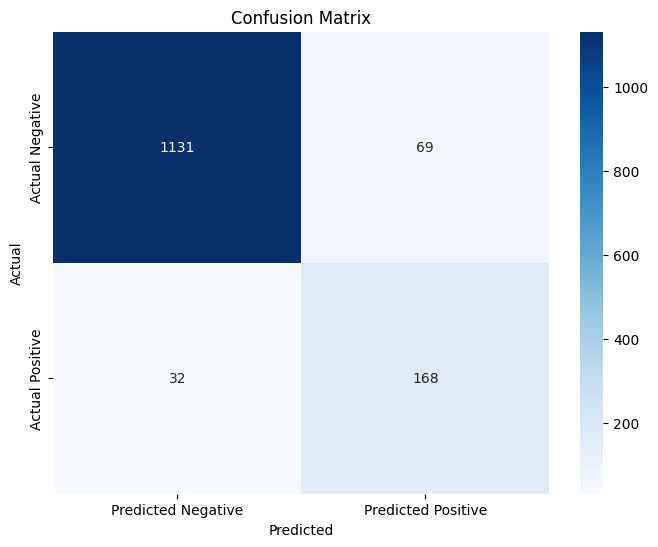

Accuracy 0.9278571428571428
Precision 0.7088607594936709
Recall 0.84
F1_score 0.7688787185354691


In [ ]:
# analysing the other matrices after the tuning
cm = confusion_matrix(Y_test,y_pred_best_model)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
print("Accuracy",accuracy_score(Y_test,y_pred_best_model))
print("Precision",precision_score(Y_test,y_pred_best_model))
print("Recall",recall_score(Y_test,y_pred_best_model))
print("F1_score",f1_score(Y_test,y_pred_best_model))

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'class_weight': ['balanced'],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, 50],
    'max_features': ['sqrt', 'log2'],
}

grid_search = GridSearchCV(estimator=df_rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, Y_train)

# Get the best estimator
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred_best_model = best_model.predict(X_test)

# Metrics for the best model
print("Best Model Parameters: ", grid_search.best_params_)
print("Accuracy:  ", accuracy_score(Y_test, y_pred_best_model))
print("Precision: ", precision_score(Y_test, y_pred_best_model))
print("Recall:    ", recall_score(Y_test, y_pred_best_model))
print("F1_score:  ", f1_score(Y_test, y_pred_best_model))


Best Model Parameters:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'n_estimators': 200}
Accuracy:   0.9257142857142857
Precision:  0.6951219512195121
Recall:     0.855
F1_score:   0.7668161434977577


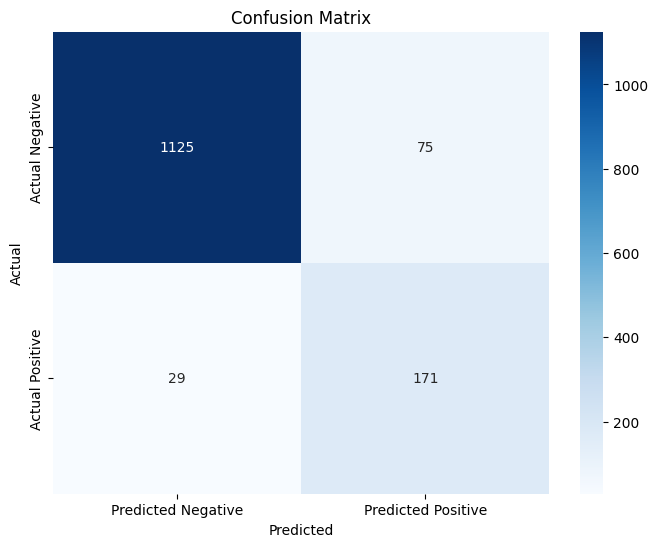

Accuracy 0.9257142857142857
Precision 0.6951219512195121
Recall 0.855
F1_score 0.7668161434977577


In [ ]:
coma = confusion_matrix(Y_test,y_pred_best_model)
plt.figure(figsize=(8, 6))
sns.heatmap(coma, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
print("Accuracy",accuracy_score(Y_test,y_pred_best_model))
print("Precision",precision_score(Y_test,y_pred_best_model))
print("Recall",recall_score(Y_test,y_pred_best_model))
print("F1_score",f1_score(Y_test,y_pred_best_model))